# Data Science Regression Project:Playstore App Downloads Prediction

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
import seaborn as sns

# Data Load: Load Data Sets into a dataframe

In [2]:
train = pd.read_csv(r'E:/DataSetHackathon/Train_16.csv')
test  = pd.read_csv(r'E:/DataSetHackathon/Test_16.csv')

In [3]:
train.head()

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads
0,ps_id-24654,Finance,4.18,1481,Varies with device,Free,Everyone,May 05 2020,Varies with device,Varies with device,"100,000+"
1,ps_id-35329,Music And Audio,4.81,302,10M,Free,Everyone,Mar 26 2020,3.9.18,4.1 and up,"5,000+"
2,ps_id-11044,Game Casual,4.27,374,27M,Free,Everyone,May 01 2020,1.10.1,4.1 and up,"10,000+"
3,ps_id-36068,Business,4.03,122058,Varies with device,Free,Teen,May 02 2020,Varies with device,Varies with device,"10,000,000+"
4,ps_id-35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,"5,000+"


In [4]:
train.Offered_By.value_counts().head(10)

ps_id-863      20
ps_id-1157     14
ps_id-30634     9
ps_id-35979     8
ps_id-216       7
ps_id-1713      6
ps_id-1515      6
ps_id-24144     6
ps_id-1812      6
ps_id-1417      6
Name: Offered_By, dtype: int64

In [5]:
train.Category.value_counts()

Education              1440
Tools                  1231
Entertainment           927
Books And Reference     741
Family                  686
Finance                 667
Lifestyle               659
Productivity            570
Music And Audio         526
Business                521
Health And Fitness      441
Personalization         440
Game                    426
News And Magazines      413
Photography             408
Game Puzzle             398
Sports                  397
Shopping                378
Travel And Local        369
Communication           365
Medical                 326
Game Casual             287
Game Arcade             280
Social                  271
Game Action             235
Food And Drink          222
Video Players           222
Game Card               192
Game Simulation         192
Maps And Navigation     179
Game Educational        179
Game Role Playing       169
Game Strategy           166
Game Adventure          130
Auto And Vehicles       126
Game Word           

#### Droping the duplicate values

In [6]:
train.drop_duplicates('Offered_By', keep = 'last', inplace = True)
train.Offered_By.value_counts()

ps_id-21110    1
ps_id-30942    1
ps_id-35376    1
ps_id-13606    1
ps_id-21459    1
              ..
ps_id-33557    1
ps_id-29143    1
ps_id-16226    1
ps_id-23867    1
ps_id-2412     1
Name: Offered_By, Length: 15520, dtype: int64

### Converting the datatype to numeric

In [7]:
train['Reviews'] = pd.to_numeric(train.Reviews, errors = 'coerce')

### Replacing the "Varies with devices" with NaN value

In [8]:
train['Size'][train['Size' ] == 'Varies with devices'] = np.nan

C:\Users\AAA\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Replacing the "M" with 10*6 & "k" with 10*3 and then replacing the NaN value with the mean value of the column

In [9]:
train['Size'] = train.Size.str.replace('M', 'e6')
train['Size'] = train.Size.str.replace('K', 'e3')

In [10]:
train['Size'] = pd.to_numeric(train['Size'], errors = 'coerce')
train['Size'] = train['Size'].fillna(train['Size'].mean())

In [11]:
train.head()

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads
0,ps_id-24654,Finance,4.18,1481,2.331788e+07,Free,Everyone,May 05 2020,Varies with device,Varies with device,"100,000+"
1,ps_id-35329,Music And Audio,4.81,302,1.000000e+07,Free,Everyone,Mar 26 2020,3.9.18,4.1 and up,"5,000+"
2,ps_id-11044,Game Casual,4.27,374,2.700000e+07,Free,Everyone,May 01 2020,1.10.1,4.1 and up,"10,000+"
3,ps_id-36068,Business,4.03,122058,2.331788e+07,Free,Teen,May 02 2020,Varies with device,Varies with device,"10,000,000+"
4,ps_id-35831,Medical,4.60,358,2.331788e+07,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,"5,000+"


### Replacing the "+" with ' ' and "," with ' ' and then converting the dtype to numeric

In [12]:
train['Downloads'] = train.Downloads.str.replace('+', '')
train['Downloads'] = train.Downloads.str.replace(',', '')

In [13]:
train['Downloads'] = pd.to_numeric(train['Downloads'], errors = 'coerce')

In [14]:
train.head()

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads
0,ps_id-24654,Finance,4.18,1481,2.331788e+07,Free,Everyone,May 05 2020,Varies with device,Varies with device,100000
1,ps_id-35329,Music And Audio,4.81,302,1.000000e+07,Free,Everyone,Mar 26 2020,3.9.18,4.1 and up,5000
2,ps_id-11044,Game Casual,4.27,374,2.700000e+07,Free,Everyone,May 01 2020,1.10.1,4.1 and up,10000
3,ps_id-36068,Business,4.03,122058,2.331788e+07,Free,Teen,May 02 2020,Varies with device,Varies with device,10000000
4,ps_id-35831,Medical,4.60,358,2.331788e+07,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,5000


### Considering the features that are required to build our model and neglecting others, scaling the data to a normal form using MinMaxScaler and doing EDA (Exploratory Data Analysis)

In [15]:
data = train[['Rating','Reviews','Size','Downloads']]
data.head()

,Rating,Reviews,Size,Downloads
0,4.18,1481,2.331788e+07,100000
1,4.81,302,1.000000e+07,5000
2,4.27,374,2.700000e+07,10000
3,4.03,122058,2.331788e+07,10000000
4,4.60,358,2.331788e+07,5000


In [16]:
data.info()
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15520 entries, 0 to 16515
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rating     15520 non-null  float64
 1   Reviews    15520 non-null  int64  
 2   Size       15520 non-null  float64
 3   Downloads  15520 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 606.2 KB


In [17]:
scaler_x.fit(data[['Rating']])
c1 = scaler_x.transform(data[['Rating']])
df1 = pd.DataFrame(c1, columns=['Rating'])
scaler_x.fit(data[['Reviews']])
c2 = scaler_x.transform(data[['Reviews']])
df2 = pd.DataFrame(c2, columns=['Reviews'])
scaler_x.fit(data[['Size']])
c3 = scaler_x.transform(data[['Size']])
df3 = pd.DataFrame(c3, columns=['Size'])
scaler_y.fit(data[['Downloads']])
c4 = scaler_y.transform(data[['Downloads']])
df4 = pd.DataFrame(c4, columns=['Downloads'])
concat = pd.concat([df1,df2,df3,df4], axis=1)
concat.head()

,Rating,Reviews,Size,Downloads
0,0.7950,0.000017,0.194069,0.000100
1,0.9525,0.000004,0.078261,0.000005
2,0.8175,0.000004,0.226087,0.000010
3,0.7575,0.001423,0.194069,0.010000
4,0.9000,0.000004,0.194069,0.000005


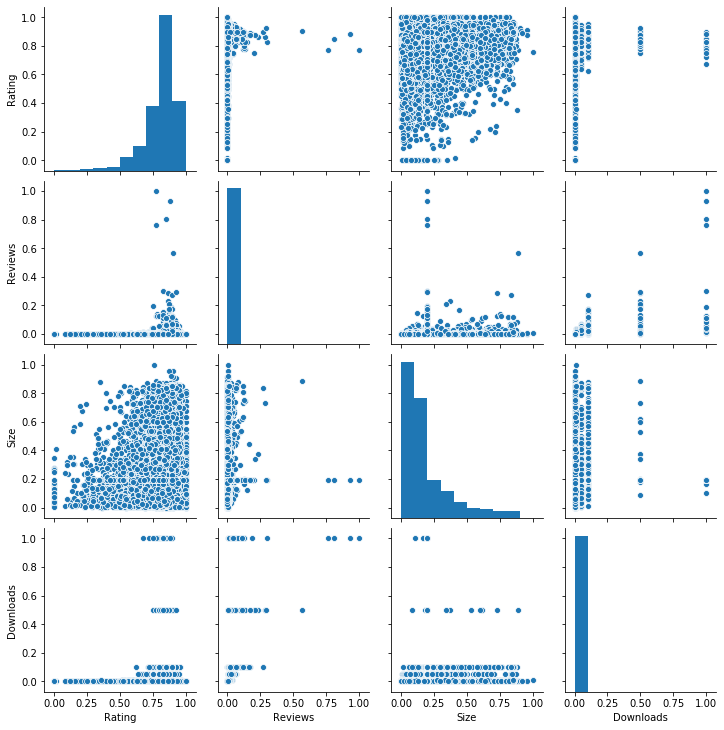

In [18]:
sns.pairplot(concat)

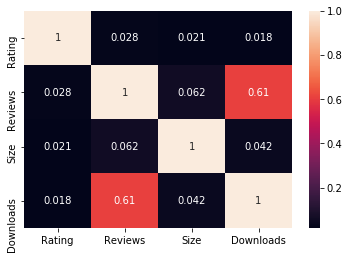

In [19]:
sns.heatmap(concat.corr(), annot=True)

### Dividing the training datset into independent and dependent features

In [20]:
x_train = concat.iloc[:,:3].values
y_train = concat.iloc[:,-1].values

### Now the performing the same all operations with test dataset

In [21]:
test.head()

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required
0,ps_id-18231,Game Puzzle,4.52,1362,36M,Free,Everyone,May 05 2020,1.4.1,4.0.3 and up
1,ps_id-1874,Shopping,4.29,3353,Varies with device,Free,Teen,May 05 2020,Varies with device,Varies with device
2,ps_id-3182,Photography,4.55,161855,Varies with device,Free,Everyone,May 05 2020,Varies with device,Varies with device
3,ps_id-31452,Game Action,3.97,545,16M,Free,Everyone,Dec 07 2016,2,4.1 and up
4,ps_id-25641,Photography,4.65,1672,33M,Free,Everyone,Jan 25 2020,1,4.4 and up


In [22]:
test['Size'][test['Size' ] == 'Varies with devices'] = np.nan

C:\Users\AAA\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
test['Size'] = test.Size.str.replace('M', 'e6')
test['Size'] = test.Size.str.replace('K', 'e3')

In [24]:
test['Size'] = pd.to_numeric(test['Size'], errors = 'coerce')
test['Size'] = test['Size'].fillna(test['Size'].mean())

In [25]:
test.head()

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required
0,ps_id-18231,Game Puzzle,4.52,1362,3.600000e+07,Free,Everyone,May 05 2020,1.4.1,4.0.3 and up
1,ps_id-1874,Shopping,4.29,3353,2.283132e+07,Free,Teen,May 05 2020,Varies with device,Varies with device
2,ps_id-3182,Photography,4.55,161855,2.283132e+07,Free,Everyone,May 05 2020,Varies with device,Varies with device
3,ps_id-31452,Game Action,3.97,545,1.600000e+07,Free,Everyone,Dec 07 2016,2,4.1 and up
4,ps_id-25641,Photography,4.65,1672,3.300000e+07,Free,Everyone,Jan 25 2020,1,4.4 and up


In [26]:
scaler_x.fit(test[['Rating']])
c5 = scaler_x.transform(test[['Rating']])
df5 = pd.DataFrame(c5, columns=['Rating'])
scaler_x.fit(test[['Reviews']])
c6 = scaler_x.transform(test[['Reviews']])
df6 = pd.DataFrame(c6, columns=['Reviews'])
scaler_x.fit(test[['Size']])
c7 = scaler_x.transform(test[['Size']])
df7 = pd.DataFrame(c7, columns=['Size'])
concat2 = pd.concat([df5,df6,df7], axis=1)
concat2.head()

,Rating,Reviews,Size
0,0.8800,0.000016,0.101156
1,0.8225,0.000039,0.063096
2,0.8875,0.001877,0.063096
3,0.7425,0.000006,0.043353
4,0.9125,0.000019,0.092486


In [27]:
concat2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24776 entries, 0 to 24775
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rating   24776 non-null  float64
 1   Reviews  24776 non-null  float64
 2   Size     24776 non-null  float64
dtypes: float64(3)
memory usage: 580.8 KB


In [28]:
!pip install pycaret

  Using cached tqdm-4.48.2-py2.py3-none-any.whl (68 kB)
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.42.1
    Uninstalling tqdm-4.42.1:
      Successfully uninstalled tqdm-4.42.1


ERROR: pandas-profiling 2.8.0 has requirement matplotlib>=3.2.0, but you'll have matplotlib 3.1.3 which is incompatible.
ERROR: pandas-profiling 2.8.0 has requirement pandas!=1.0.0,!=1.0.1,!=1.0.2,>=0.25.3, but you'll have pandas 1.0.1 which is incompatible.
ERROR: pandas-profiling 2.8.0 has requirement requests>=2.23.0, but you'll have requests 2.22.0 which is incompatible.


In [29]:
from pycaret.regression import * 

In [30]:
exp_reg = setup(concat, target = 'Downloads', train_size=0.8)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,2725
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(15520, 4)"
4,Missing Values,False
5,Numeric Features,3
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [31]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,K Neighbors Regressor,0.0044,0.0011,0.0304,0.4694,0.0225,244.8568,0.0334
1,Light Gradient Boosting Machine,0.0043,0.0010,0.0305,0.4491,0.0226,30.6539,0.2107
2,Gradient Boosting Regressor,0.0038,0.0011,0.0310,0.4262,0.0221,130.9092,1.1125
3,Random Forest,0.0040,0.0011,0.0316,0.4131,0.0230,4.0151,2.0541
4,Huber Regressor,0.0035,0.0012,0.0326,0.4084,0.0231,40.2113,0.1635
5,Orthogonal Matching Pursuit,0.0050,0.0013,0.0332,0.3866,0.0230,1447.6986,0.0066
6,Linear Regression,0.0050,0.0013,0.0332,0.3860,0.0230,1481.4105,0.0933
7,Least Angle Regression,0.0050,0.0013,0.0332,0.3860,0.0230,1481.4105,0.0177
8,Bayesian Ridge,0.0050,0.0013,0.0332,0.3860,0.0230,1482.2946,0.0167
9,Ridge Regression,0.0058,0.0013,0.0336,0.3699,0.0241,2161.7569,0.0274


### From above thou K nearest neighbour shows better result but ensembling technique produced model are more reliable in terms of performance on unseen data so i will built my model based on Light Gradient Boosting Machine

In [33]:
import lightgbm as lgb
from sklearn.model_selection import learning_curve
reg = lgb.LGBMRegressor()

In [34]:
train_sizes, train_scores, valid_scores = learning_curve(
lgb.LGBMRegressor() , x_train, y_train, train_sizes=np.linspace(0.01, 1.0, 5), scoring='neg_root_mean_squared_error', cv=10)

In [35]:
train_scores_mean = -train_scores.mean(axis = 1)
valid_scores_mean = -valid_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean valid scores\n\n',pd.Series(valid_scores_mean, index = train_sizes))

Mean training scores

 139      0.004178
3596     0.023596
7053     0.025381
10510    0.026329
13968    0.025471
dtype: float64

 --------------------

Mean valid scores

 139      0.042129
3596     0.036407
7053     0.033532
10510    0.033048
13968    0.031557
dtype: float64


### Checking Model Perforance using Learning Curve

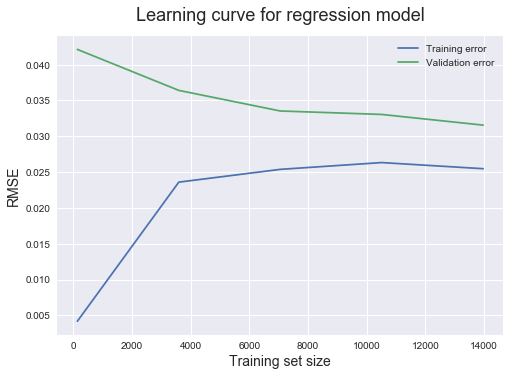

In [36]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, valid_scores_mean, label = 'Validation error')
plt.ylabel('RMSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curve for regression model', fontsize = 18, y = 1.03)
plt.legend()

### It can be seen that at first as the number of dataset increases the validation score decreases but training score increases but after certain point the model starts to show good performance that is low bias and low variance

### Now preparing for the model creation

In [37]:
concat2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24776 entries, 0 to 24775
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rating   24776 non-null  float64
 1   Reviews  24776 non-null  float64
 2   Size     24776 non-null  float64
dtypes: float64(3)
memory usage: 580.8 KB


In [38]:
x_test = concat2.values
x_test

array([[8.80000000e-01, 1.57862459e-05, 1.01156069e-01],
       [8.22500000e-01, 3.88798651e-05, 6.30963052e-02],
       [8.87500000e-01, 1.87734537e-03, 6.30963052e-02],
       ...,
       [9.45000000e-01, 5.77630453e-06, 2.89017341e-04],
       [9.02500000e-01, 3.80504202e-03, 2.05202312e-01],
       [7.45000000e-01, 1.70041415e-05, 4.91329480e-02]])

In [39]:
reg.fit(x_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [40]:
y_pred = reg.predict(x_test)
y_pred

array([1.04595397e-04, 4.35271547e-04, 6.22730831e-03, ...,
       5.42173913e-05, 1.22759827e-02, 1.65673210e-04])

In [41]:
df = pd.DataFrame(y_pred, columns =['Downloads'])
df.head(10)

,Downloads
0,0.000105
1,0.000435
2,0.006227
3,0.000137
4,0.000063
5,0.000075
6,0.000148
7,0.002754
8,0.000075
9,0.022404


## Rescaling the predicted values to its original form

In [42]:
scale = MinMaxScaler()
scale.min_, scale.scale_ = scaler_y.min_[0], scaler_y.scale_[0]

In [43]:
Y_pred = scale.inverse_transform(y_pred.reshape(1,24776))
prediction = Y_pred.T
df = pd.DataFrame(prediction, columns =['Downloads'])
df.head()

,Downloads
0,1.046054e+05
1,4.352815e+05
2,6.227318e+06
3,1.365205e+05
4,6.311385e+04


### Predicted Values in its original form